<p>
    
# FIT5196 Assessment 3
#### Student Name: Anirban Roy Chowdhury
#### Student ID: 30539676

Date: 12/10/20

Version: 1.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:

* pandas - For data manipulation
* sklearn - For linear models
* matplotlib - For plotting graphs
* nltk - For sentiment analysis
* numpy - For mathematical and matrix operation
* tabula - to read pdf ffiles
* geopandas - to read .shp files
* zipfile - to unzip files

</p>

In [1]:
import pandas as pd
from tabula import read_pdf
import xml.etree.ElementTree as et
import re
from bs4 import BeautifulSoup
import zipfile
import geopandas
from shapely.geometry import Point
import numpy as np
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import matplotlib 
%matplotlib inline

## Table of Contents

1. [Introduction](#sec_1) 
2. [Task 1: Data Integration](#sec_2)
3. [Task 2: Data Trasnformation](#sec_3)
4. [Conclusion](#sec_4)
5. [References](#sec_5)

<p>

# Introduction <a class="anchor" id="sec_1"></a>

</p>

<p>
We have been given 2 task in this assignment:

1. Task 1 - 
    * We have been given files of different formats. Each file must be read parsed, checked for errors and then be converted into a dataframe for further manipulation.
    * I will be individually converting each file format into a dataframe and then combining the different dataframes to create the final desrired output,

2. Task -
    * In this task we will be studying the effects of different trasnformation and normalizations on the data.
    * Following will be trasnformation we will go through:
        * Power transformation
        * Log transformation
        * Min-Max Normalization
        * Z-score Normalization
        * Box-Cox transformation


</p>

# Task 1: Data Integration <a class="anchor" id="sec_2"></a>

## Extracting from zip file

In [2]:
#Unzip Files
path_to_zip_file = 'D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676.zip'
directory_to_extract_to = 'D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [3]:
#Unzip Files
path_to_zip_file = 'D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information.zip'
directory_to_extract_to = 'D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [4]:
#Unzip Files
path_to_zip_file = 'D:\\2.Uni Work\\FIT5196\\Assignment3\\vic_suburb_boundary.zip'
directory_to_extract_to = 'D:\\2.Uni Work\\FIT5196\\Assignment3\\vic_suburb_boundary'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

## Super Markets(Excel)

In [5]:
#Read excel file
df_super_markets = pd.read_excel('D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676\\supermarkets.xlsx')
df_super_markets

,Unnamed: 0,id,lat,lng,type
0,0,S_001,-37.883978,144.735287,Woolworths
1,1,S_002,-41.161591,147.514797,Woolworths
2,2,S_003,-37.984078,145.077167,Woolworths
3,3,S_004,-37.707023,144.938740,Woolworths
4,4,S_005,-37.597670,144.938413,Woolworths
...,...,...,...,...,...
234,234,S_235,-37.860188,145.028920,Coles
235,235,S_236,-37.875984,144.614490,Coles
236,236,S_237,-37.047330,143.744610,Coles
237,237,S_238,-38.351648,144.922881,Coles


In [6]:
#Check for null rows
df_super_markets[df_super_markets.isna().any(axis=1)]

,Unnamed: 0,id,lat,lng,type


## Real Estate(JSON)

In [7]:
#Read JSON file
df_real_estate_json = pd.read_json('D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676\\real_state.json')
df_real_estate_json

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,48948,-37.808492,145.093979,112 Winmalee Road,3060000,house,2015,5,3,2
1,9400,-37.846696,144.726952,22 Harrow Place,6545000,house,2011,3,2,2
2,24321,-37.712544,144.967846,31 Mutton Road,5610000,house,2016,3,1,2
3,86559,-37.905234,144.987596,303 St Kilda Street,27000000,house,2013,3,2,2
4,85092,-37.883222,144.986304,70 Spray Street,12060000,house,2010,3,2,2
...,...,...,...,...,...,...,...,...,...,...
1005,60216,-37.826376,145.201133,7 Glenburnie Road,15680000,house,2015,4,2,3
1006,45942,-37.731050,145.134078,2/435 Main Road,2608000,house,2013,2,1,1
1007,86234,-37.887017,144.998223,17 Rusden Street,25120000,house,2016,4,2,3
1008,4803,-37.863188,144.835679,1/9 Scullin Street,16160000,house,2016,3,3,1


In [8]:
df_real_estate_json[df_real_estate_json.isna().any(axis=1)]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space


## Real Estate(XML)

In [9]:
#Read the file
with open("D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676\\real_state.xml") as f:
    file = f.read()

In [10]:
#replacing included byte format so that the file becomes pure XML to be read by BeautifulSoap
file = file.replace("b'","")
file = file.replace("'","")
file = file.replace("1&amp;","")

In [11]:
#Object for beatuifulsoap
btree = BeautifulSoup(file,"lxml-xml") 

In [12]:
#Get all of them using groups, property id and unique key
p = re.compile('<n([0-9]+) type="int">(\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndPropertyId = p.findall(str(btree.root.property_id))
#property
propertyDict = {}
for item in ListOfUniqueIdsAndPropertyId:
    key = int(item[0])
    propertyDict[key] = item[1]

In [13]:
#Get all of them using groups, lat and unique key
p = re.compile('<n([0-9]+) type="float">(-\d+.\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndLats = p.findall(str(btree.root.lat))
#latitude
latsDict = {}
for item in ListOfUniqueIdsAndLats:
    key = int(item[0])
    latsDict[key] = item[1]

In [14]:
#Get all of them using groups, lng and unique key
p = re.compile('<n([0-9]+) type="float">(\d+.\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndLng = p.findall(str(btree.root.lng))
#longitude
lngDict = {}
for item in ListOfUniqueIdsAndLng:
    key = int(item[0])
    lngDict[key] = item[1]

In [15]:
#TO DO
#Get all of them using groups, addr_street and unique key
p = re.compile('<n[0-9]+ type="str">([\w\s\d\/\-\,\.\']+)<\/n([0-9]+)>')
ListOfUniqueIdsAndAddr = p.findall(str(btree.root.addr_street))
#Address
addrDict = {}
for item in ListOfUniqueIdsAndAddr:
    key = int(item[1])
    addrDict[key] = item[0]
# addrDict[57894]='4/93 Esdale Street'

In [16]:
#Get all of them using groups, price and unique key
p = re.compile('<n([0-9]+) type="int">(\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndPrice = p.findall(str(btree.root.price))
#Price
priceDict = {}
for item in ListOfUniqueIdsAndPrice:
    key = int(item[0])
    priceDict[key] = int(item[1])

In [17]:
#Get all of them using groups, Property Type and unique key
p = re.compile('<n([0-9]+) type="str">([\w]+)<\/n[0-9]+>')
ListOfUniqueIdsAndPropType = p.findall(str(btree.root.property_type))
#Property Type
propTypeDict = {}
for item in ListOfUniqueIdsAndPropType:
    key = int(item[0])
    propTypeDict[key] = item[1]

In [18]:
#Get all of them using groups, Year and unique key
p = re.compile('<n([0-9]+) type="int">(\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndYear = p.findall(str(btree.root.year))
#Year
yearDict = {}
for item in ListOfUniqueIdsAndYear:
    key = int(item[0])
    yearDict[key] = item[1]

In [19]:
#Get all of them using groups, bedrooms and unique key
p = re.compile('<n([0-9]+) type="int">(\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndBedrooms = p.findall(str(btree.root.bedrooms))
#Bedrooms
bedroomDict = {}
for item in ListOfUniqueIdsAndBedrooms:
    key = int(item[0])
    bedroomDict[key] = item[1]

In [20]:
#Get all of them using groups, bathroom and unique key
p = re.compile('<n([0-9]+) type="int">(\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndBathrooms = p.findall(str(btree.root.bathrooms))
#Bedrooms
bathroomDict = {}
for item in ListOfUniqueIdsAndBathrooms:
    key = int(item[0])
    bathroomDict[key] = item[1]

In [21]:
#Get all of them using groups, Parking Space and unique key
p = re.compile('<n([0-9]+) type="int">(\d+)<\/n[0-9]+>')
ListOfUniqueIdsAndParking = p.findall(str(btree.root.parking_space))
#parking
parkingDict = {}
for item in ListOfUniqueIdsAndParking:
    key = int(item[0])
    parkingDict[key] = item[1]

In [22]:
#Create a final dict with all the attribute and key as the unique id
uniqueIDs = propertyDict.keys()
final_dict = {}
for uid in uniqueIDs:
    #Create a row with all the values from the dict as a tuple
    row = (propertyDict[uid],latsDict[uid],lngDict[uid],addrDict[uid],priceDict[uid],propTypeDict[uid],yearDict[uid],\
           bedroomDict[uid],bathroomDict[uid],parkingDict[uid])
    #Add to final dict
    final_dict[uid] = row

In [23]:
#Create a dataframe from the combined dict
df_real_estate_xml = pd.DataFrame.from_dict(final_dict, orient='index',columns=['property_id','lat','lng','addr_street','price','property_type','year','bedrooms',\
                                                          'bathrooms','parking_space'])

In [24]:
#Check for null rows
df_real_estate_xml[df_real_estate_xml.isna().any(axis=1)]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space


### Concatenating XML and JSON real estate data frame to get a combined dataframe.

In [25]:
#join our xml and Json for a combined dataframe
df_combind_real_estate = pd.concat([df_real_estate_json,df_real_estate_xml],ignore_index=True)

In [26]:
#All unique property_id
len(df_combind_real_estate.property_id.unique())

2011

In [27]:
#Check for null rows
df_combind_real_estate[df_combind_real_estate.isna().any(axis=1)]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space


## Shopping Center(HTML)

In [28]:
#Read_html returns a list of dataframes since we know our html contains only 1 table we can directly get it, otherise
#we can use concatinate to combine all the dataframes into one
df_shopping_center = pd.read_html('D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676\\shopingcenters.html')[0]
df_shopping_center

,Unnamed: 0,sc_id,lat,lng
0,0,SC_001,-37.767915,145.041790
1,1,SC_002,-37.819375,145.171472
2,2,SC_003,-37.971131,145.089065
3,3,SC_004,-35.280406,149.132550
4,4,SC_005,-37.574572,144.920451
...,...,...,...,...
114,114,SC_115,-38.014916,145.323404
115,115,SC_116,43.105259,-76.091619
116,116,SC_117,-38.005454,145.217573
117,117,SC_118,-37.486265,144.589067


In [29]:
#Check for null rows
df_shopping_center[df_shopping_center.isna().any(axis=1)]

,Unnamed: 0,sc_id,lat,lng


## Hospital(PDF)

In [30]:
#Read pdf file using tabula
df_hospital = read_pdf('D:\\2.Uni Work\\FIT5196\\Assignment3\\30539676\\hospitals.pdf',pages='all',lattice=True)
#Drop useless columns
df_hospital[2]=df_hospital[2].drop(['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'],axis=1)
df_hospital[3]=df_hospital[3].drop(['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'],axis=1)
#Change names of column
df_hospital[2].rename(columns={'Unnamed: 1':'Unnamed: 0'},inplace=True)
df_hospital[3].rename(columns={'Unnamed: 1':'Unnamed: 0'},inplace=True)
#Concatinate all the dataframes
df_hospitals_combines = pd.concat(df_hospital)
#set index of data frame as the one given in the columns
df_hospitals_combines.set_index('Unnamed: 0',inplace=True)
df_hospitals_combines

,id,lat,lng,name
Unnamed: 0,,,,
0.0,hospital_001,-37.990622,145.072836,Como Private Hospital
1.0,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2.0,hospital_003,-37.792230,144.889128,Western Hospital
3.0,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4.0,hospital_005,-37.760623,144.815624,Sunshine Hospital
...,...,...,...,...
194.0,hospital_195,-38.234091,146.406812,Maryvale Private Hospital
195.0,hospital_196,-37.837972,144.996182,South Yarra Clinic
196.0,hospital_197,-37.798231,144.957169,Prof George Andrew Varigos Specialist Practice


In [31]:
#Check for null rows
df_hospitals_combines[df_hospitals_combines.isna().any(axis=1)]

,id,lat,lng,name
Unnamed: 0,,,,
NaN,NaN,NaN,NaN,NaN


In [32]:
#Drop null rows
df_hospitals_combines.dropna(inplace=True)

In [33]:
#Check for null rows
df_hospitals_combines[df_hospitals_combines.isna().any(axis=1)]

,id,lat,lng,name
Unnamed: 0,,,,


## GTFS - Melbourne Train Information

In [34]:
#Read all files
df_stops = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\stops.txt')
df_calender = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\calendar.txt')
df_calender_date = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\calendar_dates.txt')
df_routes = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\routes.txt')
df_shape = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\shapes.txt')
df_stop_times = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\stop_times.txt')
df_trip = pd.read_csv('D:\\2.Uni Work\\FIT5196\\Assignment3\\GTFS_Melbourne_Train_Information\\1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)\\GTFS - Melbourne Train Information\\trips.txt')

In [35]:
# Function to return formatted time.
def fix_time(raw_time):
    try:
        #For normal time
        return datetime.strptime(raw_time, "%H:%M:%S").time()
    except:
        #For times which have gone wrong 24hrs in the .txt file
        return datetime.strptime('00' + raw_time[2:], "%H:%M:%S").time()

In [36]:
#Get the correct time for times such as 24:15:00
df_stop_times['arrival_time'] = df_stop_times['arrival_time'].apply(lambda x:fix_time(x))
df_stop_times['departure_time'] = df_stop_times['departure_time'].apply(lambda x:fix_time(x))

## VIC Subrubs

In [37]:
#Read the geo files
vic_locality_df = geopandas.read_file('D:\\2.Uni Work\\FIT5196\\Assignment3\\vic_suburb_boundary\\VIC_LOCALITY_POLYGON_shp.shp')

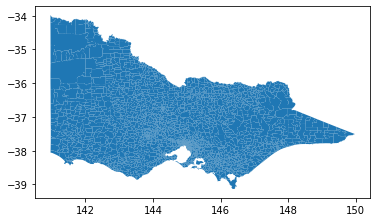

In [38]:
#Show geo polygons
vic_locality_df.plot()

## Imputing all the missing columns from the data above

In [39]:
# Copied from : https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
#Function to calculate haversine distance between 2 coordinate points
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6378
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 4)

In [40]:
#Function to calculate the nearest shopping center
def compute_the_nearest_shopping_center(row):
    nearest_shopping_center = None
    shortest_distance = -1
    #Cusotmer Longitude
    prop_long = float(row.lng)
    #Customer Latitude
    prop_lat = float(row.lat)
    for index,row in df_shopping_center.iterrows():
        cal_distance = haversine_distance(prop_lat,prop_long,float(row['lat']),float(row['lng']))
        if  shortest_distance == -1 or shortest_distance > cal_distance:
            nearest_shopping_center = row['sc_id']
            shortest_distance = cal_distance
    return(nearest_shopping_center,shortest_distance)      

In [41]:
#Function to calculate the nearest hospital
def compute_the_nearest_hospital(row):
    nearest_hospital = None
    shortest_distance = -1
    #Cusotmer Longitude
    prop_long = float(row.lng)
    #Customer Latitude
    prop_lat = float(row.lat)
    for index,row in df_hospitals_combines.iterrows():
        cal_distance = haversine_distance(prop_lat,prop_long,float(row['lat']),float(row['lng']))
        if  shortest_distance == -1 or shortest_distance > cal_distance:
            nearest_hospital = row['id']
            shortest_distance = cal_distance
    return(nearest_hospital,shortest_distance)      

In [42]:
#Function to calculate the nearest hospital
def compute_the_nearest_supermarket(row):
    nearest_supermarket = None
    shortest_distance = -1
    #Cusotmer Longitude
    prop_long = float(row.lng)
    #Customer Latitude
    prop_lat = float(row.lat)
    for index,row in df_super_markets.iterrows():
        cal_distance = haversine_distance(prop_lat,prop_long,float(row['lat']),float(row['lng']))
        if  shortest_distance == -1 or shortest_distance > cal_distance:
            nearest_supermarket = row['id']
            shortest_distance = cal_distance
    return(nearest_supermarket,shortest_distance)      

In [43]:
#Function to calculate the nearest train station
def compute_the_nearest_train_station(row):
    nearest_train_station = None
    shortest_distance = -1
    #Cusotmer Longitude
    prop_long = float(row.lng)
    #Customer Latitude
    prop_lat = float(row.lat)
    for index,row in df_stops.iterrows():
        cal_distance = haversine_distance(prop_lat,prop_long,float(row['stop_lat']),float(row['stop_lon']))
        if  shortest_distance == -1 or shortest_distance > cal_distance:
            nearest_train_station = row['stop_id']
            shortest_distance = cal_distance
    return(nearest_train_station,shortest_distance)      

In [44]:
def get_subrub(property_point):
    #iterate over all locality
    for index,row in vic_locality_df.iterrows():
        #Check if the point is within that locality
        if property_point.within(vic_locality_df.geometry.loc[index]):
            #if yes return the id
            return vic_locality_df.VIC_LOCA_2.loc[index]
    #else return not available
    return 'not available'

In [45]:
#Combine lat long into point obj
df_combind_real_estate['coordinate'] = df_combind_real_estate.apply(lambda x:Point(float(x['lng']),float(x['lat'])),axis=1)
#Locate subrub
df_combind_real_estate['suburb']=df_combind_real_estate['coordinate'].apply(lambda x:get_subrub(x))

In [46]:
#Shopping Center
df_combind_real_estate['Shopping_center_id'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_shopping_center(x)[0],axis=1)
df_combind_real_estate['Distance_to_sc'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_shopping_center(x)[1],axis=1)

In [47]:
#Hospital 
df_combind_real_estate['Hospital_id'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_hospital(x)[0],axis=1)
df_combind_real_estate['Distance_to_hospital'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_hospital(x)[1],axis=1)

In [48]:
#Super market
df_combind_real_estate['Supermarket_id'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_supermarket(x)[0],axis=1)
df_combind_real_estate['Distance_to_supermarket'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_supermarket(x)[1],axis=1)

In [49]:
#Train Station
df_combind_real_estate['Train_station_id'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_train_station(x)[0],axis=1)
df_combind_real_estate['Distance_to_train_station'] = df_combind_real_estate.apply(lambda x:compute_the_nearest_train_station(x)[1],axis=1)

## Time to CBD from closest train station

In [50]:
#Trips with Flinders as the end station, i.r direct trains
tripIdsForDirectCBD = list(set(df_stop_times.loc[df_stop_times.stop_id == 19854,'trip_id']))

In [51]:
#Trains running on all weekdays
serviceIDWeekdats = list(set(df_calender.loc[((df_calender['monday'] == 1) & (df_calender['tuesday'] == 1) \
                 & (df_calender['wednesday'] == 1) & (df_calender['thursday'] == 1) \
                 & (df_calender['friday'] == 1)),'service_id']))

In [52]:
#All trip ids for weekdays
possibleTripIdsForWeekdays = list(set(df_trip.loc[df_trip.service_id.isin(serviceIDWeekdats),'trip_id']))
#All direct transfers
directTripsToFlinders = [trip_id for trip_id in possibleTripIdsForWeekdays if trip_id in tripIdsForDirectCBD]

In [53]:
#Get stops which have their trip_id in a direct route to flinders
df_stopsWeekdays = df_stop_times[df_stop_times["trip_id"].isin(directTripsToFlinders)].copy()

In [54]:
#Train departing from all station except flinders
df_stop_times_departure = df_stopsWeekdays.loc[df_stop_times.stop_id != 19854,:].copy()
#Trains arriving at flinders
df_stop_times_arrival = df_stopsWeekdays.loc[df_stop_times.stop_id == 19854,:].copy()

In [55]:
#filtering trains between 7Am-9AM
df_stop_times_departed_time = df_stop_times_departure.loc[((df_stop_times_departure.departure_time > datetime.strptime("07:00:00", "%H:%M:%S").time())\
                                                           &(df_stop_times_departure.departure_time<datetime.strptime("09:00:00", "%H:%M:%S").time())),:].copy()

In [56]:
df_trips_stops_ids = df_stop_times_departed_time[["trip_id", "stop_id"]].copy()
# Getting a list of stops grouped by trip id.
trip_ids_and_stop_ids_series = df_trips_stops_ids.groupby("trip_id").stop_id.apply(list)

In [57]:
# Getting a list of trips running in the morning.
trip_ids_in_morning = list(set(df_stop_times_departed_time["trip_id"]))
# Filtering in the arrival instances for each of the morning trips.
df_stop_times_arrival = df_stop_times_arrival.loc[(df_stop_times_arrival["trip_id"].isin(trip_ids_in_morning)),:]

In [58]:
# Function to identify if the train is coming from south bank or goinf to south bank.
def filter_outgoing_from_flinders(trip_id, departureTime):
    filtered_arrival_df = df_stop_times_arrival[(df_stop_times_arrival["trip_id"] == trip_id)]
    # Extracting the arrival time.
    arrivalTime = list(filtered_arrival_df["arrival_time"])[0]
    if arrivalTime < departureTime:
        return 1
    return 0

In [59]:
# Filtering out trips which do not have flinders as a stop.
df_possible_trip_to_flinders = df_stop_times[(df_stop_times["trip_id"].isin(trip_ids_in_morning))].copy()
# Identifying the trips heading towards flinders
df_possible_trip_to_flinders["filter"] = df_possible_trip_to_flinders.apply(lambda row: filter_outgoing_from_flinders(row["trip_id"], row["departure_time"]), axis=1)
# Filtering all trips outgoing from flinders
df_possible_trip_to_flinders = df_possible_trip_to_flinders[(df_possible_trip_to_flinders["filter"] == 0)]
#Drop col
df_possible_trip_to_flinders=df_possible_trip_to_flinders.drop('filter',axis=1)

In [60]:
# Getting a list of possible station ids.
stationIds = list(set(df_possible_trip_to_flinders["stop_id"]))
# Filtering out the stops which do not have a direct train to South Bank.
df_possible_stops = df_stops[(df_stops["stop_id"].isin(stationIds))].copy()

In [61]:
# Function to return the average travel time to Flinders from the station.
def get_average_travel_time(station_id):
    travelTime = []
    for trip_id in trip_ids_in_morning:
        # Checking if the station can be on the trip being iterated over.
        if station_id in trip_ids_and_stop_ids_series[trip_id]:
            # Filtering in the departure_time instance from station for the trip being iterated over.
            df_departure_time = df_stop_times_departed_time[((df_stop_times_departed_time["stop_id"] == station_id)\
                                                                      &(df_stop_times_departed_time["trip_id"] == trip_id))]
             
            # Extracting the departure time.
            departureTime = list(df_departure_time["departure_time"])[0]            
             # Filtering in the arrival_time instance from station for the trip being iterated over.
            df_arrival_time = df_stop_times_arrival[(df_stop_times_arrival["trip_id"] == trip_id)]            
            # Extracting the arrival time.
            arrivalTime = list(df_arrival_time["arrival_time"])[0]            
            # Calculating the time taken between stations.
            time_taken = datetime.combine(date.today(), arrivalTime) - datetime.combine(date.today(), departureTime)            
            # Converting and appending the time taken in mins if the time taken was positive.
            if time_taken.total_seconds() > 0:
                travelTime.append(time_taken.total_seconds() / 60.0)    
    # Returning the average time taken to complete journey.
    if(len(travelTime) > 0):
        return math.floor(sum(travelTime) / len(travelTime))
    
    return 0

In [62]:
df_combind_real_estate['travel_min_to_CBD'] = df_combind_real_estate["Train_station_id"].apply(lambda x: get_average_travel_time(x))
df_combind_real_estate['Transfer_flag'] = df_combind_real_estate["travel_min_to_CBD"].apply(lambda x: 1 if x>0 else 0)

In [63]:
#Check for null rows
df_combind_real_estate[df_combind_real_estate.isna().any(axis=1)]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,...,Shopping_center_id,Distance_to_sc,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag


In [64]:
#output cols for csv
outputCols = ['property_id','lat','lng','addr_street','suburb','price','property_type','year','bedrooms',\
'bathrooms','parking_space','Shopping_center_id','Distance_to_sc','Train_station_id',\
'Distance_to_train_station','travel_min_to_CBD','Transfer_flag','Hospital_id','Distance_to_hospital',\
'Supermarket_id','Distance_to_supermarket']

In [65]:
#Write csv
df_combind_real_estate.to_csv('30539676_A3_solution.csv',index=False,columns=outputCols)

# Task 2: Data Reshaping<a class="anchor" id="sec_3"></a>

<p>
We will now be going through different reshaping techniques to see their effects on the data and the final model created.
Before we start we will create a baseline model which we can use to compare the other models we created after transforming the data.
</p>

In [66]:
#Create a copy of the combined dataset
df_combind_real_estate_reshape = df_combind_real_estate[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital','price']].copy()

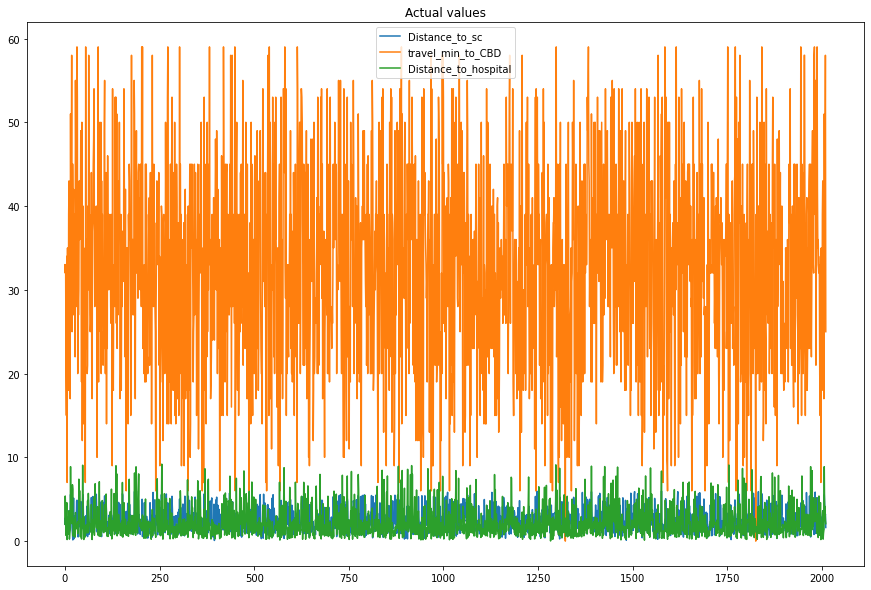

In [67]:
# Plotting values of non-standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc'].plot(),\
df_combind_real_estate_reshape['travel_min_to_CBD'].plot(),\
df_combind_real_estate_reshape['Distance_to_hospital'].plot()
plt.legend(["Distance_to_sc","travel_min_to_CBD","Distance_to_hospital"])
plt.title("Actual values")
plt.show()

In [68]:
#Baseline model without any trasformation
#Building a model and testing its accuracy.

training_x, testing_x, training_y, testing_y = train_test_split(df_combind_real_estate_reshape[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']],\
                                                                df_combind_real_estate_reshape[['price']] , test_size=0.3, random_state=212)

lm_price_of_house = LinearRegression()

lm_price_of_house.fit(training_x, training_y)

print("R square value for model:", lm_price_of_house.score(testing_x, testing_y))
baseLineModelScore =  lm_price_of_house.score(testing_x, testing_y)

R square value for model: 0.12603345137336208


<p>
We can see from the above graph that while the scale of Distance_to_sc and Distance_to_hospital are almost within the same range, or travel_time_to_CBD varries greatly. 

From the baseline model created we can see that these variable gives us a score of 12.3% prediction accuracy. While this is not a good score it will form our basis to measure the transformations and normalizations we will be performing below.


</p>

## Z-score Normalization

In [69]:
#apply Z-scale normatlization to the features
std_scale = preprocessing.StandardScaler().\
fit(df_combind_real_estate_reshape[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])
df_std = std_scale.transform(df_combind_real_estate_reshape[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])

In [70]:
#get teh scaled values
df_combind_real_estate_reshape['Distance_to_sc_scaled'] = df_std[:,0]
df_combind_real_estate_reshape['travel_min_to_CBD_scaled'] = df_std[:,1]
df_combind_real_estate_reshape['Distance_to_hospital_scaled'] = df_std[:,2]

In [71]:
#checking the mean and std of our scaled values.
df_combind_real_estate_reshape.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,Distance_to_sc_scaled,travel_min_to_CBD_scaled,Distance_to_hospital_scaled
count,2011.000000,2011.000000,2011.000000,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03
mean,2.529483,32.616609,2.233438,9.300597e+06,8.590289e-17,5.896162e-17,1.227263e-16
std,1.331730,12.037822,1.822807,6.043588e+06,1.000249e+00,1.000249e+00,1.000249e+00
min,0.075200,0.000000,0.013100,1.287000e+06,-1.843387e+00,-2.710185e+00,-1.218391e+00
25%,1.494500,23.000000,0.998400,5.390000e+06,-7.773649e-01,-7.990649e-01,-6.777162e-01
50%,2.277100,33.000000,1.691600,7.712000e+06,-1.895620e-01,3.185682e-02,-2.973290e-01
75%,3.327400,40.000000,2.721700,1.118800e+07,5.993077e-01,6.135020e-01,2.679291e-01
max,5.974200,59.000000,9.190600,4.641000e+07,2.587292e+00,2.192253e+00,3.817679e+00


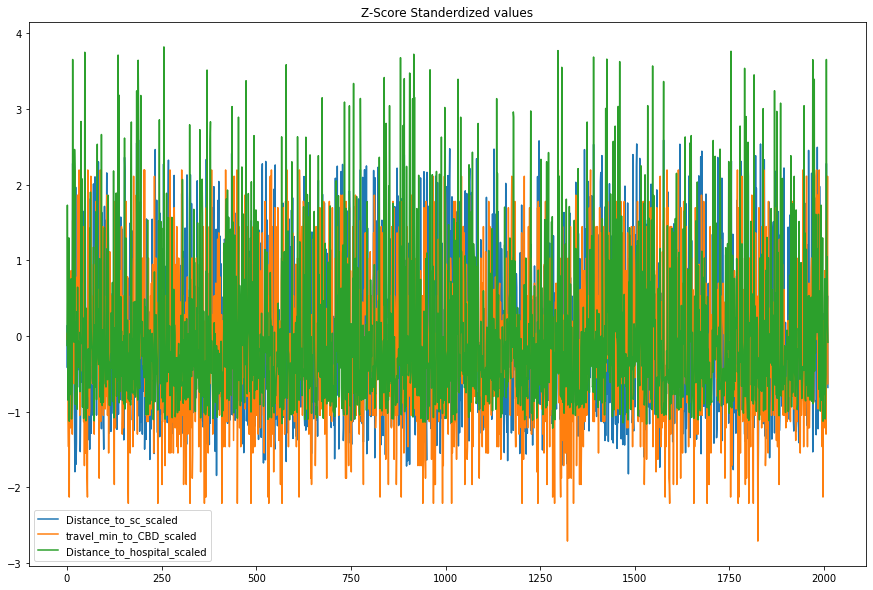

In [72]:
# Plotting values of Z-scored standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_scaled'].plot(),\
df_combind_real_estate_reshape['travel_min_to_CBD_scaled'].plot(),\
df_combind_real_estate_reshape['Distance_to_hospital_scaled'].plot()
plt.legend(["Distance_to_sc_scaled","travel_min_to_CBD_scaled","Distance_to_hospital_scaled"])
plt.title("Z-Score Standerdized values")
plt.show()

In [73]:
#Building a model with the Z-scored normalized values

training_x, testing_x, training_y, testing_y = train_test_split(df_combind_real_estate_reshape[['Distance_to_sc_scaled','travel_min_to_CBD_scaled','Distance_to_hospital_scaled']],\
                                                                df_combind_real_estate_reshape[['price']] , test_size=0.3, random_state=212)

lm_price_of_house = LinearRegression()

lm_price_of_house.fit(training_x, training_y)

print("R square value for model:", lm_price_of_house.score(testing_x, testing_y))
print("Improvement Over Baseline:", (lm_price_of_house.score(testing_x, testing_y)-baseLineModelScore))

R square value for model: 0.12603345137336208
Improvement Over Baseline: 0.0


<p>
Form the above graph we can see that all our values for the columns have been centered around 0. We see that this has the postive effect of bringing our 'travel_min_to_CBD' values in a similar range as our other 2 features.
All the values of our features are within <b>-3 to 4.</b>

However we see no improvement in our model, still it is always prefered to have all your features scaled as opposed to not scaled.
</p>

## Min-Max Normalization

In [74]:
#Scale using min-max scaler
minmax_scale = preprocessing.MinMaxScaler().fit(df_combind_real_estate_reshape[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])
df_minmax = minmax_scale.transform(df_combind_real_estate_reshape[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']])
df_minmax[0:5]

array([[0.4460417 , 0.55932203, 0.21695451],
       [0.32119003, 0.54237288, 0.58490874],
       [0.44599085, 0.55932203, 0.29480795],
       [0.68447194, 0.33898305, 0.07316807],
       [0.27387693, 0.25423729, 0.22092073]])

In [75]:
#Assigned the scaled values to a column
df_combind_real_estate_reshape['Distance_to_sc_minmax'] = df_minmax[:,0]
df_combind_real_estate_reshape['travel_min_to_CBD_minmax'] = df_minmax[:,1]
df_combind_real_estate_reshape['Distance_to_hospital_minmax'] = df_minmax[:,2]

In [76]:
df_combind_real_estate_reshape.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,Distance_to_sc_scaled,travel_min_to_CBD_scaled,Distance_to_hospital_scaled,Distance_to_sc_minmax,travel_min_to_CBD_minmax,Distance_to_hospital_minmax
count,2011.000000,2011.000000,2011.000000,2.011000e+03,2.011000e+03,2.011000e+03,2.011000e+03,2011.000000,2011.000000,2011.000000
mean,2.529483,32.616609,2.233438,9.300597e+06,8.590289e-17,5.896162e-17,1.227263e-16,0.416051,0.552824,0.241933
std,1.331730,12.037822,1.822807,6.043588e+06,1.000249e+00,1.000249e+00,1.000249e+00,0.225755,0.204031,0.198617
min,0.075200,0.000000,0.013100,1.287000e+06,-1.843387e+00,-2.710185e+00,-1.218391e+00,0.000000,0.000000,0.000000
25%,1.494500,23.000000,0.998400,5.390000e+06,-7.773649e-01,-7.990649e-01,-6.777162e-01,0.240600,0.389831,0.107360
50%,2.277100,33.000000,1.691600,7.712000e+06,-1.895620e-01,3.185682e-02,-2.973290e-01,0.373267,0.559322,0.182893
75%,3.327400,40.000000,2.721700,1.118800e+07,5.993077e-01,6.135020e-01,2.679291e-01,0.551314,0.677966,0.295135
max,5.974200,59.000000,9.190600,4.641000e+07,2.587292e+00,2.192253e+00,3.817679e+00,1.000000,1.000000,1.000000


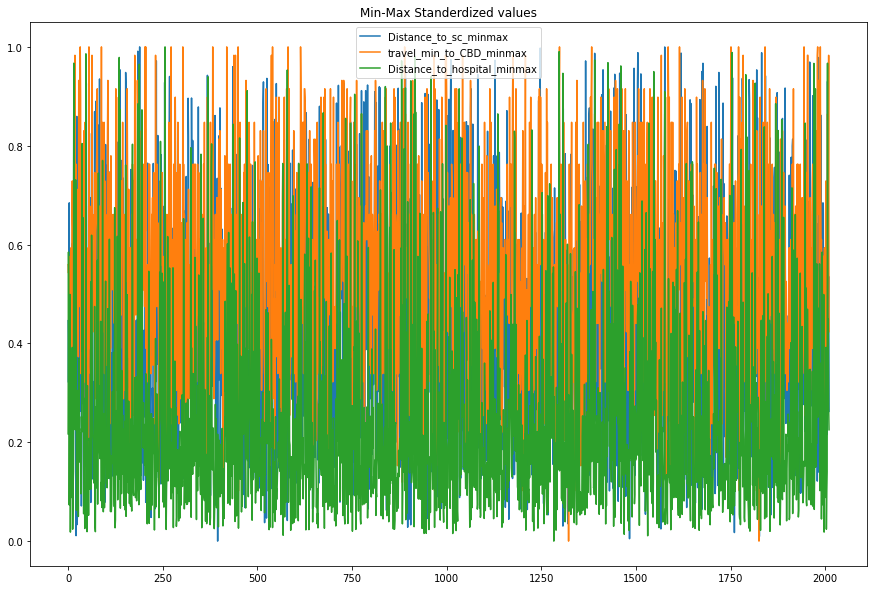

In [77]:
# Plotting values of min-max standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_minmax'].plot(),\
df_combind_real_estate_reshape['travel_min_to_CBD_minmax'].plot(),\
df_combind_real_estate_reshape['Distance_to_hospital_minmax'].plot()
plt.legend(["Distance_to_sc_minmax","travel_min_to_CBD_minmax","Distance_to_hospital_minmax"])
plt.title("Min-Max Standerdized values")
plt.show()

In [78]:
#Building a model with the min-max normalized values

training_x, testing_x, training_y, testing_y =\
train_test_split(df_combind_real_estate_reshape[['Distance_to_sc_minmax','travel_min_to_CBD_minmax','Distance_to_hospital_minmax']],\
                                                                df_combind_real_estate_reshape[['price']] , test_size=0.3, random_state=212)

lm_price_of_house = LinearRegression()

lm_price_of_house.fit(training_x, training_y)

print("R square value for model:", lm_price_of_house.score(testing_x, testing_y))
print("Improvement Over Baseline:", (lm_price_of_house.score(testing_x, testing_y)-baseLineModelScore))

R square value for model: 0.12603345137336208
Improvement Over Baseline: 0.0


<p>
Min-max scaler scales each feature individually such that there are within a given range. The scaling is given by
    
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

Again we see something similar to Z-score normalization, where all our values are within a certain range, in this case between 1 to 0.

Similar to Z-score we can see that there is no improvement over our baseline linear model.

</p>

# Data Transformations

<p>
Before starting any form of data transformation it is a good idea to get a feel of the general layout of the datapoints pf our feature.
    
Doing some simple plots can help us make these decisions.

</p>

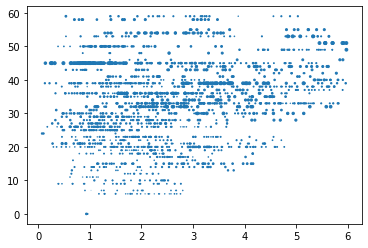

In [79]:
plt.scatter(df_combind_real_estate_reshape['Distance_to_sc'],df_combind_real_estate_reshape['travel_min_to_CBD'],\
          df_combind_real_estate_reshape['Distance_to_hospital'])

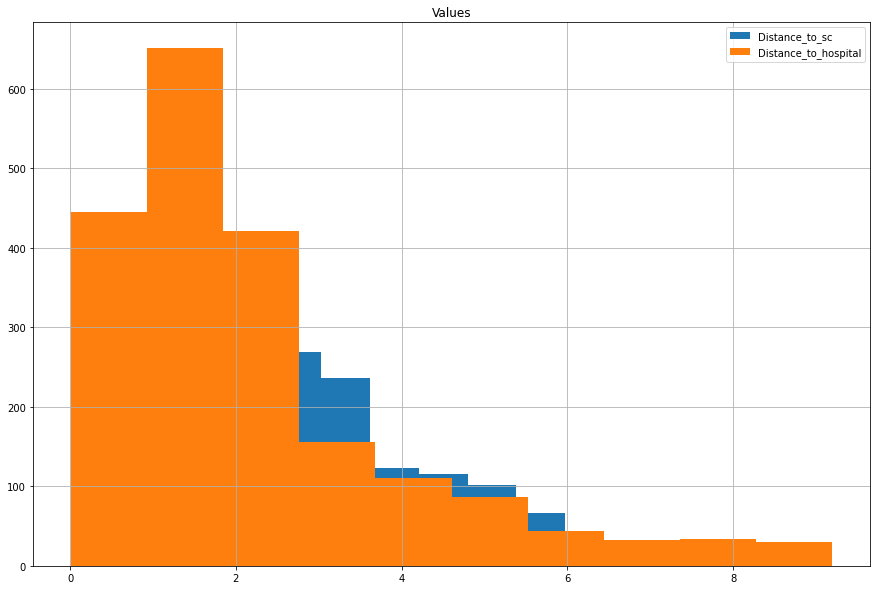

In [80]:
# Plotting values of columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc'].hist(),\
df_combind_real_estate_reshape['Distance_to_hospital'].hist()
plt.legend(["Distance_to_sc","Distance_to_hospital"])
plt.title("Values")
plt.show()

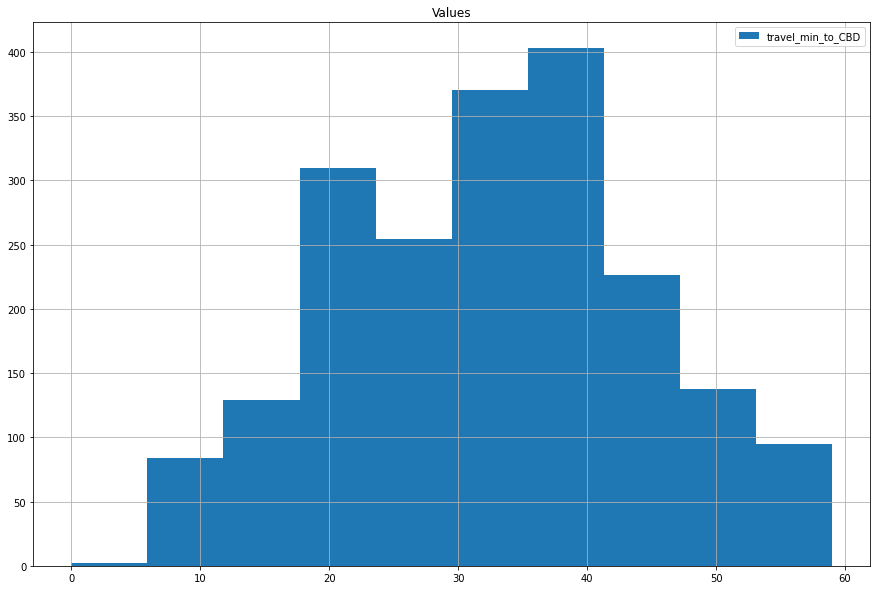

In [81]:
# Plotting values of columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['travel_min_to_CBD'].hist()
plt.legend(["travel_min_to_CBD"])
plt.title("Values")
plt.show()

<p>
From our histogram we can see that our travel_to_CBD is normally distributed but our other 2 features are heavily left skewed.

Our aim for data trasnformation will be to remove this skewness while keeping data integrity.

</p>

## Log Transformation

In [82]:
#Scale using logtransformation
df_combind_real_estate_reshape['Distance_to_sc_log'] = df_combind_real_estate_reshape['Distance_to_sc'].apply(lambda x:\
                                                                                                                     math.log(x))
df_combind_real_estate_reshape['Distance_to_hospital_log'] = df_combind_real_estate_reshape['Distance_to_hospital'].apply(lambda x:\
                                                                                                                     math.log(x))

In [83]:
#This is being done seperately due to having 0 values in the columns
i = 0
for row in df_combind_real_estate_reshape.iterrows():
    try:
        df_combind_real_estate_reshape.at[i,'travel_min_to_CBD_log']=math.log(df_combind_real_estate_reshape["travel_min_to_CBD"][i]) 
    except:
        df_combind_real_estate_reshape.at[i,'travel_min_to_CBD_log']=0
    i += 1

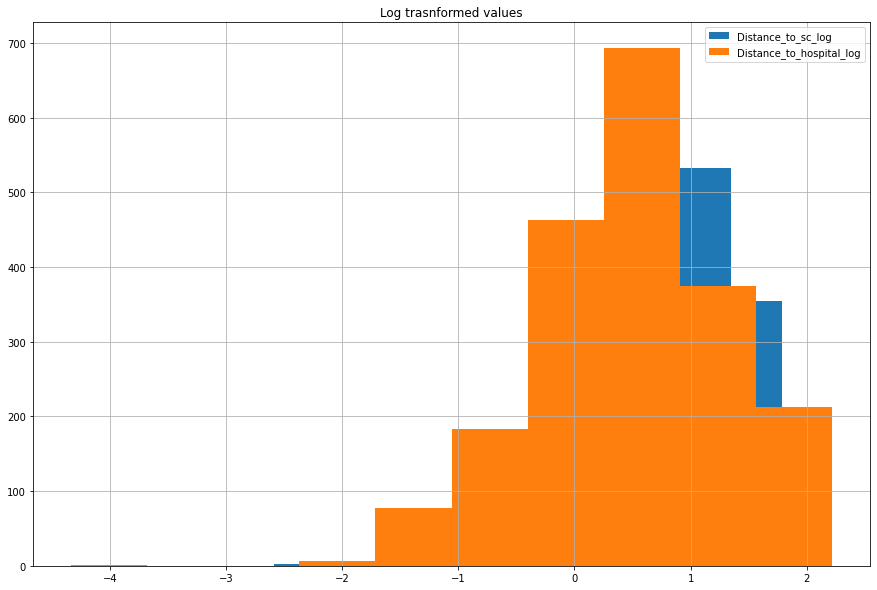

In [84]:
# Plotting values of log standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_log'].hist(),\
df_combind_real_estate_reshape['Distance_to_hospital_log'].hist(),\
plt.legend(["Distance_to_sc_log","Distance_to_hospital_log"])
plt.title("Log trasnformed values")
plt.show()

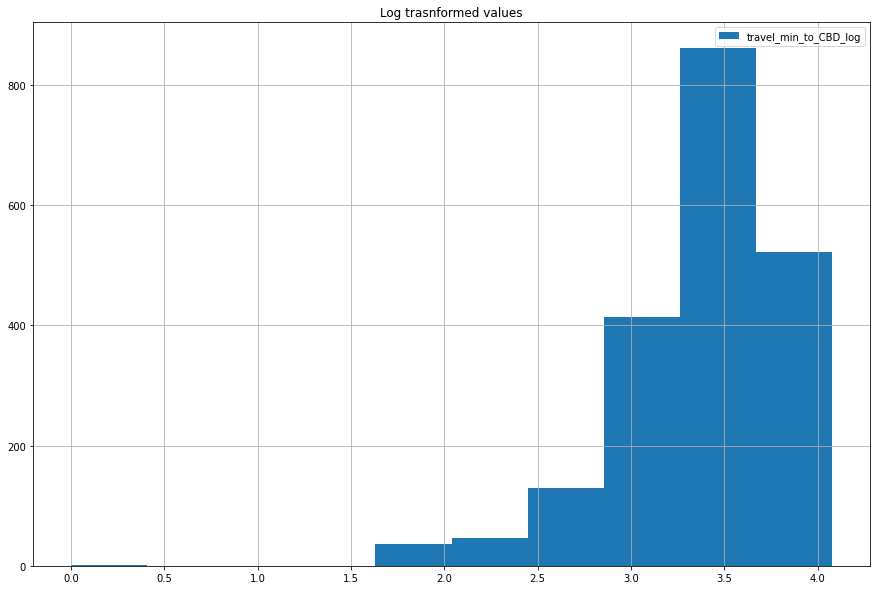

In [85]:
# Plotting values of log standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['travel_min_to_CBD_log'].hist()
plt.legend(["travel_min_to_CBD_log"])
plt.title("Log trasnformed values")
plt.show()

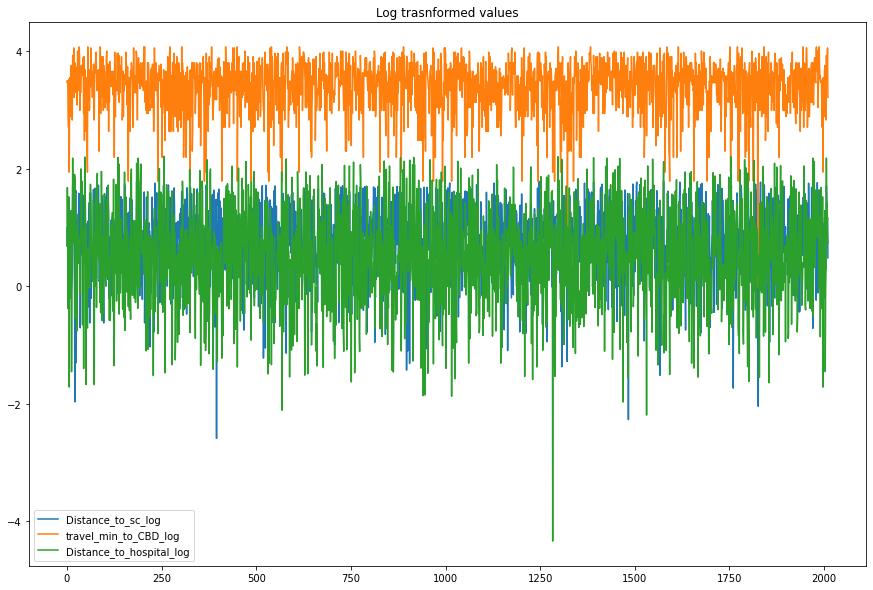

In [86]:
# Plotting values of log standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_log'].plot(),\
df_combind_real_estate_reshape['travel_min_to_CBD_log'].plot(),\
df_combind_real_estate_reshape['Distance_to_hospital_log'].plot(),

plt.legend(["Distance_to_sc_log","travel_min_to_CBD_log","Distance_to_hospital_log"])
plt.title("Log trasnformed values")
plt.show()

In [87]:
#Building a model with the log normalized values

training_x, testing_x, training_y, testing_y =\
train_test_split(df_combind_real_estate_reshape[['Distance_to_sc_log','Distance_to_hospital_log','travel_min_to_CBD_log']],\
                                                                df_combind_real_estate_reshape[['price']] , test_size=0.3, random_state=212)

lm_price_of_house = LinearRegression()

lm_price_of_house.fit(training_x, training_y)

print("R square value for model:", lm_price_of_house.score(testing_x, testing_y))
print("Improvement Over Baseline:", (lm_price_of_house.score(testing_x, testing_y)-baseLineModelScore))

R square value for model: 0.12353361620639325
Improvement Over Baseline: -0.0024998351669688335


<p>
While log tranformation is able to correctly normalize our 2 distance features, it counter-productively right skews our travel feature data. 

From the negative scoreline we can conclude that the travel feature is contributing more towards the price of the house as compared to the other 2 features.
    
It also detract from the final score of the model.

</p>

## Power Transformation

In [88]:
#Scale using power trasnformation
df_combind_real_estate_reshape['Distance_to_sc_pow'] = \
df_combind_real_estate_reshape['Distance_to_sc'].apply(lambda x:math.pow(x,2))
df_combind_real_estate_reshape['Distance_to_hospital_pow'] = \
df_combind_real_estate_reshape['Distance_to_hospital'].apply(lambda x:math.pow(x,2))
df_combind_real_estate_reshape['travel_min_to_CBD_pow'] = \
df_combind_real_estate_reshape['travel_min_to_CBD'].apply(lambda x:math.pow(x,2))

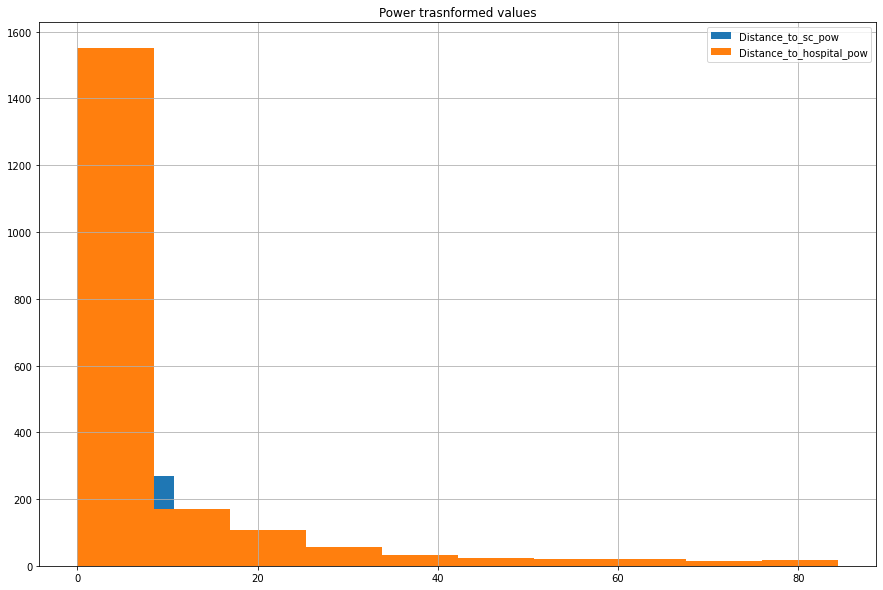

In [89]:
# Plotting values of power standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_pow'].hist(),\
df_combind_real_estate_reshape['Distance_to_hospital_pow'].hist(),\
plt.legend(["Distance_to_sc_pow","Distance_to_hospital_pow"])
plt.title("Power trasnformed values")
plt.show()

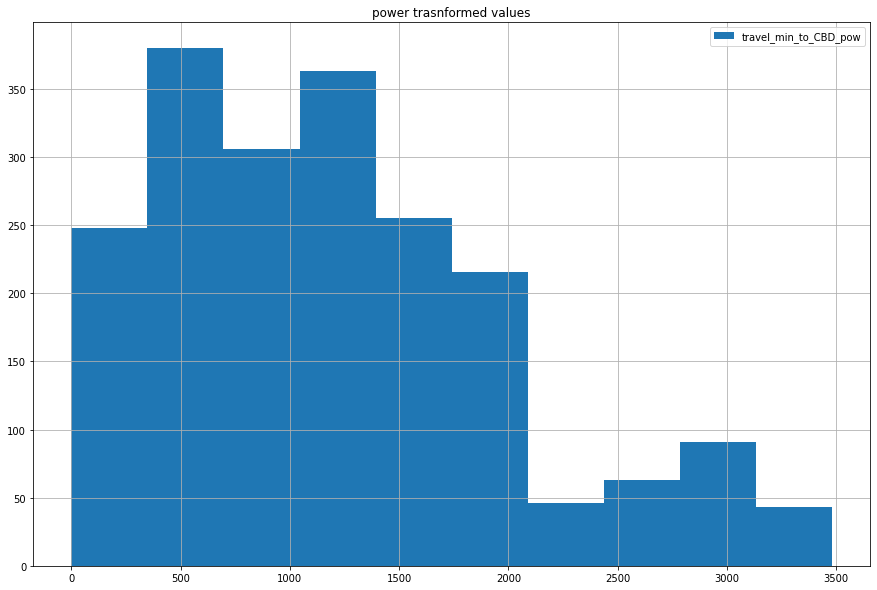

In [90]:
# Plotting values of power standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['travel_min_to_CBD_pow'].hist()
plt.legend(["travel_min_to_CBD_pow"])
plt.title("power trasnformed values")
plt.show()

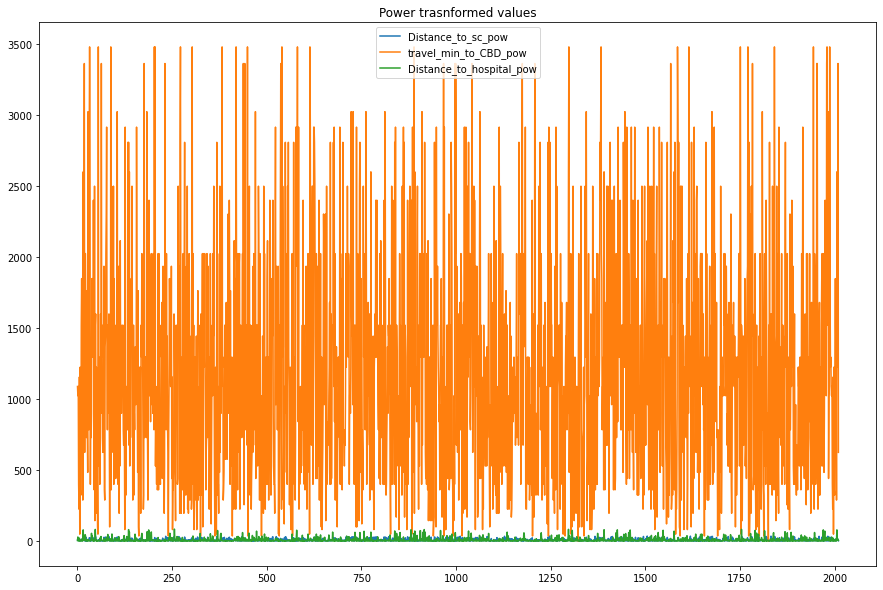

In [91]:
# Plotting values of power standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_pow'].plot(),\
df_combind_real_estate_reshape['travel_min_to_CBD_pow'].plot(),\
df_combind_real_estate_reshape['Distance_to_hospital_pow'].plot()
plt.legend(["Distance_to_sc_pow","travel_min_to_CBD_pow","Distance_to_hospital_pow"])
plt.title("Power trasnformed values")
plt.show()

In [92]:
#Building a model with the power normalized values

training_x, testing_x, training_y, testing_y =\
train_test_split(df_combind_real_estate_reshape[['Distance_to_sc_pow','Distance_to_hospital_pow','travel_min_to_CBD_pow']],\
                                                                df_combind_real_estate_reshape[['price']] , test_size=0.3, random_state=212)

lm_price_of_house = LinearRegression()

lm_price_of_house.fit(training_x, training_y)

print("R square value for model:", lm_price_of_house.score(testing_x, testing_y))
print("Improvement Over Baseline:", (lm_price_of_house.score(testing_x, testing_y)-baseLineModelScore))

R square value for model: 0.10996802233620939
Improvement Over Baseline: -0.01606542903715269


<p>
Power trasnformation also dosent help in normalization, infact it further disrupts the normalization in our travel_min_to_CBD feature. This is further reinforced by the negative improvement we see meaning our baseline model was performing better.
</p>

## Box-Cox Transformation

In [93]:
#Adding 1 to all values to avoid caluculation by 0 problem in the code.
df_combind_real_estate_reshape['travel_min_to_CBD'] = df_combind_real_estate_reshape['travel_min_to_CBD'].apply(lambda x:x+1)

In [94]:
#Apply box-cox scalers to the features.
df_combind_real_estate_reshape['Distance_to_sc_boxcox']=stats.boxcox(df_combind_real_estate_reshape['Distance_to_sc'])[0]
df_combind_real_estate_reshape['Distance_to_hospital_boxcox']=stats.boxcox(df_combind_real_estate_reshape['Distance_to_hospital'])[0]
df_combind_real_estate_reshape['travel_min_to_CBD_boxcox']=stats.boxcox(df_combind_real_estate_reshape['travel_min_to_CBD'])[0]

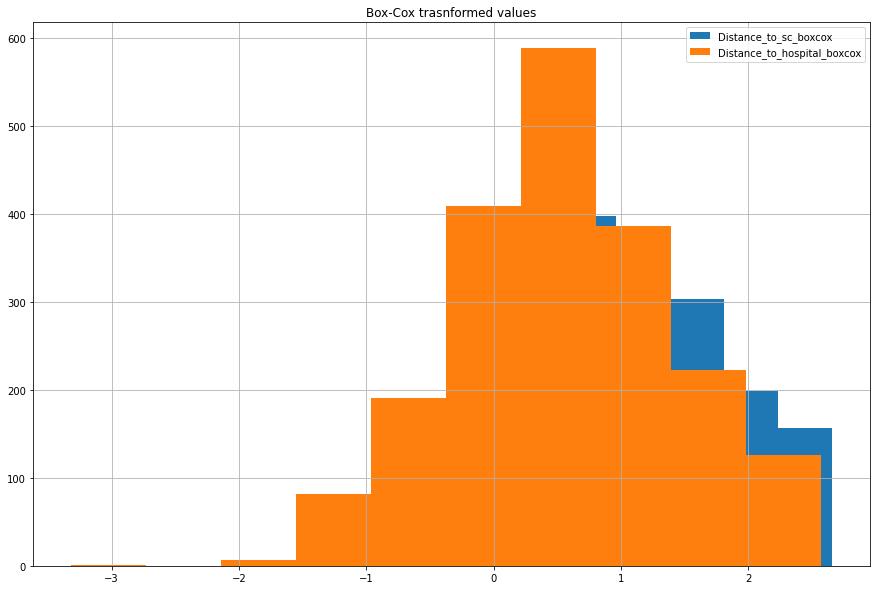

In [95]:
# Plotting values of box-cox standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_boxcox'].hist(),\
df_combind_real_estate_reshape['Distance_to_hospital_boxcox'].hist(),\
plt.legend(["Distance_to_sc_boxcox","Distance_to_hospital_boxcox"])
plt.title("Box-Cox trasnformed values")
plt.show()

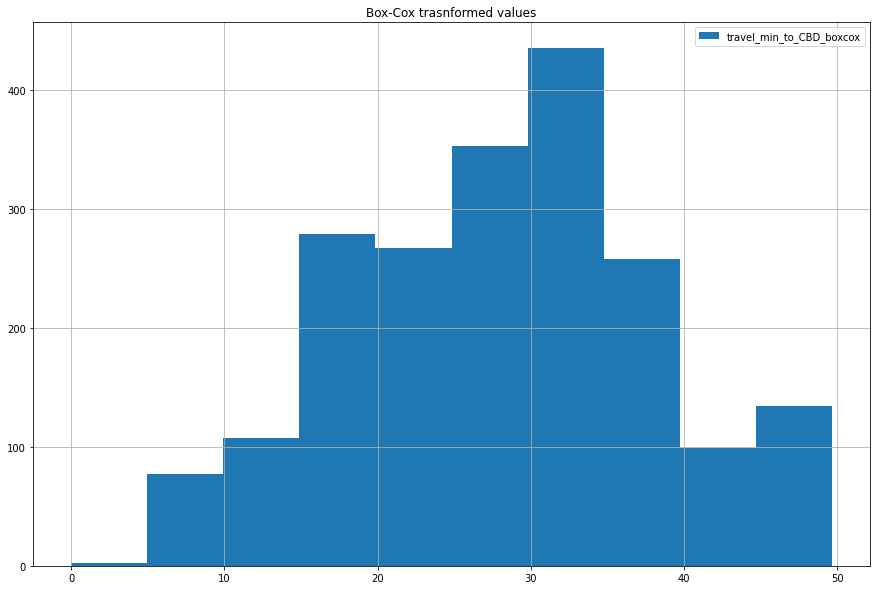

In [96]:
# Plotting values of box-cox standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['travel_min_to_CBD_boxcox'].hist()
plt.legend(["travel_min_to_CBD_boxcox"])
plt.title("Box-Cox trasnformed values")
plt.show()

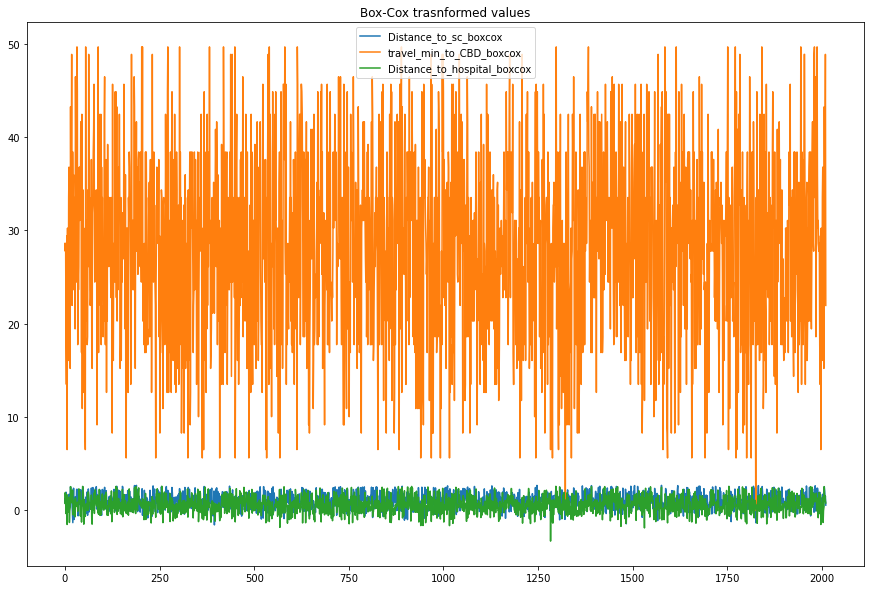

In [97]:
# Plotting values of box-cox standardised columns.
plt.figure(figsize=(15,10))
df_combind_real_estate_reshape['Distance_to_sc_boxcox'].plot(),\
df_combind_real_estate_reshape['travel_min_to_CBD_boxcox'].plot(),\
df_combind_real_estate_reshape['Distance_to_hospital_boxcox'].plot(),
plt.legend(["Distance_to_sc_boxcox","travel_min_to_CBD_boxcox","Distance_to_hospital_boxcox"])
plt.title("Box-Cox trasnformed values")
plt.show()

In [98]:
#Building a model with the box-cox normalized values

training_x, testing_x, training_y, testing_y =\
train_test_split(df_combind_real_estate_reshape[['Distance_to_sc_boxcox','travel_min_to_CBD_boxcox','Distance_to_hospital_boxcox']],\
                                                                df_combind_real_estate_reshape[['price']] , test_size=0.3, random_state=212)

lm_price_of_house = LinearRegression()

lm_price_of_house.fit(training_x, training_y)

print("R square value for model:", lm_price_of_house.score(testing_x, testing_y))
print("Improvement Over Baseline:", (lm_price_of_house.score(testing_x, testing_y)-baseLineModelScore))

R square value for model: 0.1318019695882624
Improvement Over Baseline: 0.00576851821490032


<p>
Following the formula used by the package:

    y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0    

Compared to our last 3 trasnformation, box-cox has properly been abe to scale our values. We can see this in our first positive improvement on our baseline Linear model.
    
From the graphs we can see that we have been able to normalize our distance features around 0, while our travel to CBD feature has been normalized around 30.

</p>

# Conclusion<a class="anchor" id="sec_4"></a>

<p>

1. In conclusion we can see that box-cox trasnformation has provided us with the best normalization result as well as a positive improvement score. 

2. Log and power trasnformation do not get us the desired result of normalized data

3. However, while in this excercise we have normalized each feature using teh same tranformation, in real world situation, we should be using different normalization for different features, to gain the best results.

4. Z-score and min-max normalization also have no improvement on our model, though they do normalize the data and give a consistent scale accross features.

</p>

# Reference:<a class="anchor" id="sec_5"></a>

1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
2. https://stackoverflow.com/
3. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html